# Linear Regression

In [1]:
import pandas as pd
import numpy as np

weight_pd = pd.read_csv('data/weightV2.csv')
weight_pd.head()

,Weight,Waist
0,154.25,85.2
1,173.25,83.0
2,154.00,87.9
3,184.75,86.4
4,184.25,100.0


In [2]:
y = weight_pd.pop('Weight').values
X = weight_pd.values
X.shape

(251, 1)

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(' R squared statistic: {:.2f}'.format(reg.score(X, y)))
print(' Slope: {:.2f}'.format(reg.coef_[0]))
print(' Intercept: {:.2f}'.format(reg.intercept_))

 R squared statistic: 0.76
 Slope: 2.31
 Intercept: -35.45


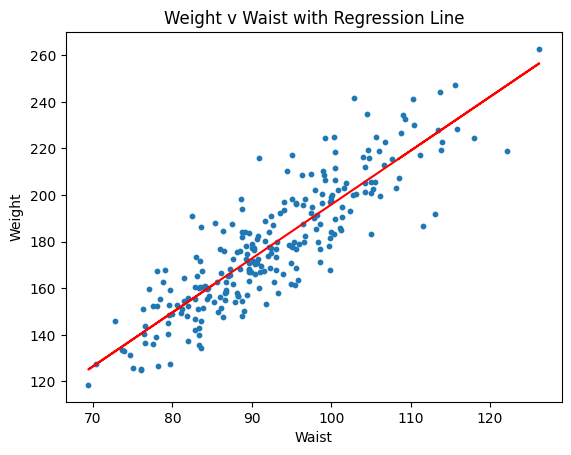

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
Y_pred = reg.predict(X)

plt.scatter(X, y, s = 10)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Waist')
plt.ylabel('Weight')
plt.title ('Weight v Waist with Regression Line' )
plt.show()

## Multivariate Regression

In [5]:
bikes_df = pd.read_csv('data/bike_sharing.csv')
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
y = bikes_df.pop('count').values   # target values
#pop off features that are not useful
bikes_df.pop('casual')
bikes_df.pop('registered')
bikes_df.pop('instant')
bikes_df.pop('dteday')

X = bikes_df.values
X.shape

(731, 11)

In [7]:
bikes_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [8]:
#Ordinary Least Squares regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X_scal = StandardScaler().fit_transform(X)

reg = LinearRegression().fit(X_scal, y)
print(' R squared statistic: {:.3f}'.format(reg.score(X_scal, y)))
print(' Intercept: {:.2f}'.format(reg.intercept_))

 R squared statistic: 0.800
 Intercept: 4504.35


In [9]:
#print out the weights
for i,j in zip(reg.coef_, bikes_df.columns):
    print(i,j)

565.8744533798863 season
1020.350746088661 yr
-134.4619910961301 mnth
-86.69260451551551 holiday
138.36029286893717 weekday
55.95577694359955 workingday
-332.69556803804244 weathersit
371.14099460440605 temp
581.9065590011754 atemp
-145.0162394610445 hum
-198.07054397855802 windspeed


In [10]:
#Stochastic Gradient Descent Regressor
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor(max_iter=50, tol=1e-3).fit(X_scal, y)
print(' R squared statistic: {:.3f}'.format(SGD.score(X_scal, y)))
print(' Intercept: {:.2f}'.format(SGD.intercept_[0]))

 R squared statistic: 0.800
 Intercept: 4503.25


In [11]:
for i,j in zip(SGD.coef_, bikes_df.columns):
    print(i,j)

550.3099705758959 season
1025.4674562132745 yr
-121.0225008769775 mnth
-86.90620164968828 holiday
136.94717970774022 weekday
53.802250632187885 workingday
-334.1165519289952 weathersit
473.06239922789996 temp
479.88464195691523 atemp
-148.5268699866707 hum
-203.0881579932784 windspeed


### Performance Measures

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [13]:
import numpy as np

def RMSE(y_true, y_pred): 
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [14]:
print('MSE: %.2f'
      % mean_squared_error(y, SGD.predict(X_scal)))
print('MAE: %.2f'
      % mean_absolute_error(y, SGD.predict(X_scal)))
print('RMSE: %.2f'
      % RMSE(y, SGD.predict(X_scal)))

MSE: 748923.23
MAE: 645.97
RMSE: 865.40


## Logistic Regression

In [16]:
athlete_pd = pd.read_csv('data/AthleteSelection.csv')
athlete_pd.sort_values('Agility',inplace = True, ascending = False)
athlete_pd.head(5)

,Athlete,Speed,Agility,Selected
16,x17,5.25,9.50,Yes
13,x14,5.75,8.75,Yes
12,x13,8.25,8.50,Yes
3,x4,3.25,8.25,No
18,x19,7.50,8.00,Yes


In [17]:
y = athlete_pd.pop('Selected').values
athlete_pd.pop('Athlete')  # get rid of ids from dataset
X = athlete_pd.values
X.shape

(20, 2)

In [19]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(solver='liblinear').fit(X, y)
print(' R squared statistic: {:.2f}'.format(lreg.score(X, y)))
print(' Speed: {:.2f} Agility: {:.2f}'.format(lreg.coef_[0][0],
                                              lreg.coef_[0][1]))
print(' Intercept: {:.2f}'.format(lreg.intercept_[0]))

 R squared statistic: 0.80
 Speed: 0.49 Agility: -0.12
 Intercept: -1.62


In [20]:
# Normalise the values and see the impact on performance on the training data
from sklearn.preprocessing import StandardScaler
X_scal = StandardScaler().fit_transform(X)
lreg = LogisticRegression(solver='liblinear').fit(X_scal, y)
print(' R squared statistic: {:.2f}'.format(lreg.score(X_scal, y)))
print(' Speed: {:.2f} Agility: {:.2f}'.format(lreg.coef_[0][0],lreg.coef_[0][1]))
print(' Intercept: {:.2f}'.format(lreg.intercept_[0]))


 R squared statistic: 0.95
 Speed: 1.83 Agility: 0.71
 Intercept: -0.42


In [21]:
X_scal[:5]

array([[ 0.36286528,  1.6692244 ],
       [ 0.64199242,  1.3274037 ],
       [ 2.03762811,  1.21346347],
       [-0.75364327,  1.09952324],
       [ 1.6189374 ,  0.98558301]])

### Example using a hold-out test set

In [23]:
diDF = pd.read_csv('data/diabetes.csv')
diDF['target'] = np.where(diDF['neg_pos'] == 'tested_positive', 1, 0)
diDF.head()

,preg,plas,pres,skin,insu,mass,pedi,age,neg_pos,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1


In [24]:
diDF.pop('neg_pos')
y = diDF.pop('target').values
X = diDF.values
X.shape, y.shape

((768, 8), (768,))

In [25]:
diDF.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [26]:
#hold out split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# different solvers can be used, check them out in the documentation...
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(solver='sag').fit(X_train, y_train)
print(' R squared statistic: {:.2f}'.format(lreg.score(X_test, y_test)))

 R squared statistic: 0.69


/Users/mauricio.reis/.pyenv/versions/3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Did not converge - must normalise the data....

In [29]:
# normalise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)


In [30]:
X_train_scal[:3]

array([[ 1.89917664, -0.19475093,  1.55717838, -1.32537379, -0.68585955,
        -1.04293476,  1.60661512,  0.06905859],
       [ 0.98286551,  0.64046336, -0.55496107,  0.80552576,  0.95873492,
        -0.4148062 ,  0.62609815,  2.37289284],
       [ 0.06655438, -0.16381707,  0.11203033, -0.55050123,  0.0671916 ,
        -1.29156898, -0.02953111,  0.32504017]])

In [31]:
X_test_scal[:3]

array([[ 0.67742846, -0.7206266 , -0.66612631,  0.80552576,  0.95873492,
         0.2656664 , -0.12611934,  0.83700334],
       [-0.54431971, -0.28755252,  0.27877819,  0.74095304, -0.68585955,
         0.4881286 , -0.95150975, -1.04019494],
       [-0.54431971, -0.41128797, -0.3326306 , -1.32537379, -0.68585955,
        -0.15308597, -0.92224058, -1.04019494]])

In [32]:
lreg = LogisticRegression(solver='sag').fit(X_train_scal, y_train)
print(' R squared statistic: {:.2f}'.format(lreg.score(X_test_scal, y_test)))

 R squared statistic: 0.74


In [33]:
lreg.coef_   #print weights

array([[ 0.18873808,  1.13801386, -0.17922493, -0.01324048, -0.10826728,
         0.81209268,  0.12322359,  0.40823078]])